<a href="https://colab.research.google.com/github/mezkymy/airline-cv-analysis/blob/dev-cleaning/airline_cust_value_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
random_state = 22

<b>Teknis Pengerjaan</b>
1. Pekerjaan dilakukan secara berkelompok, dengan output berupa:

    * File .ipynb yang berisi hasil analisis/modeling
    * Sebuah presentasi .pdf yang berisi ringkasan dari poin-poin penting yang dijabarkan pada slide-slide selanjutnya

2. Homework ini berupa soal clustering end-to-end pertanyaan bisnis dimana teman-teman akan diberikan sebuah dataset mentah berisi data customer. Teman-teman diharapkan melakukan 4 hal berikut dengan menggunakan dataset tersebut
    * EDA
    * Feature Engineering
    * Modeling + Evaluasi
    * Interpretasi model + Rekomendasi

3. Upload hasil pengerjaanmu melalui LMS dengan format nama file sebagai berikut
Nama_Lengkap_Batch_XX dalam format .html (cara save dalam format .html disini)

# Dataset
<b>Airline Customer Value Analysis Case</b>

Deskripsi:
Dataset ini berisi data customer sebuah perusahaan penerbangan dan
beberapa fitur yang dapat menggambarkan value dari customer
tersebut.

Data:
Setiap baris mewakili customer, setiap kolom berisi atribut customer.

[Link data](https://drive.google.com/drive/folders/1v7BjYPybGlhQ9oNiPwgA-1l1uh3Vi3yW)

In [3]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/mezkymy/airline-cv-analysis/main/flight.csv', parse_dates=['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'])
df = raw_data.copy()
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [4]:
# standardize column header to all lowercase to ease readability and processing
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          62988 non-null  int64         
 1   ffp_date           62988 non-null  datetime64[ns]
 2   first_flight_date  62988 non-null  datetime64[ns]
 3   gender             62985 non-null  object        
 4   ffp_tier           62988 non-null  int64         
 5   work_city          60719 non-null  object        
 6   work_province      59740 non-null  object        
 7   work_country       62962 non-null  object        
 8   age                62568 non-null  float64       
 9   load_time          62988 non-null  datetime64[ns]
 10  flight_count       62988 non-null  int64         
 11  bp_sum             62988 non-null  int64         
 12  sum_yr_1           62437 non-null  float64       
 13  sum_yr_2           62850 non-null  float64       
 14  seg_km

<b>Deskripsi Kolom</b> (dalam kapitalisasi original, sebelum diubah menjadi lower case)


* MEMBER_NO: ID Member
* FFP_DATE: Frequent Flyer Program Join Date
* FIRST_FLIGHT_DATE: Tanggal Penerbangan pertama
* GENDER: Jenis Kelamin
* FFP_TIER: Tier dari Frequent Flyer Program
* WORK_CITY: Kota Asal
* WORK_PROVINCE: Provinsi Asal
* WORK_COUNTRY: Negara Asal
* AGE: Umur Customer
* LOAD_TIME: Tanggal data diambil
* FLIGHT_COUNT: Jumlah penerbangan Customer
* BP_SUM: Rencana Perjalanan
* SUM_YR_1: Fare Revenue
* SUM_YR_2: Votes Prices
* SEG_KM_SUM: Total jarak(km) penerbangan yg sudah dilakukan
* LAST_FLIGHT_DATE: Tanggal penerbangan terakhir
* LAST_TO_END: Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
* AVG_INTERVAL: Rata-rata jarak waktu
* MAX_INTERVAL: Maksimal jarak waktu
* EXCHANGE_COUNT: Jumlah penukaran
* avg_discount: Rata rata discount yang didapat customer
* Points_Sum: Jumlah poin yang didapat customer
* Point_NotFlight: point yang tidak digunakan oleh members

Berdasarkan informasi di atas, dapat disimpulkan bahwa terdapat beberapa kolom yang memiliki data kosong, sehingga saat preprocessing perlu dilakukan handling untuk baris-baris yang memiliki data kosong tersebut.

Pada pembacaan data menggunakan `pd.read_csv`, beberapa kolom yang berbentuk tanggal langsung dibaca menjadi tipe data `datetime` menggunakan `parse_dates`, namun ada satu kolom yang tidak terbaca menjadi `datetime` yaitu kolom `last_flight_date`. Hal ini diduga diakibatkan oleh adanya beberapa data pada `last_flight_date` yang tidak berbentuk tanggal, sehingga perlu ditangani.



In [5]:
# convert last_flight_date to datetime
df['last_flight_date'] = pd.to_datetime(df['last_flight_date'], format='%m/%d/%y', errors='ignore')
df.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [6]:
# check data type after conversion
print(df['last_flight_date'].dtypes)

object


Setelah melakukan konversi tipe data kolom `last_flight_date` menjadi `datetime`, masih ditemukan beberapa data yang tidak bisa dikonversi langsung. Data tersebut mungkin perlu dilihat dan ditangani secara manual.

In [7]:
# check unconverted data
df_err = df[pd.to_datetime(df['last_flight_date'], errors='coerce').isna()]
df_err['last_flight_date'].unique()

array(['2014/2/29  0:00:00'], dtype=object)

Berdasarkan info di atas, dapat dilihat bahwa terdapat satu tanggal yang bermasalah yaitu tanggal 2014/2/29. Tanggal tersebut tidak valid karena pada tahun 2014, Bulan Februari hanya memiliki 28 hari. Untuk saat ini, data akan diubah menjadi 2014/2/28.

In [8]:
# convert 29 Feb 2019 to 28 Feb 2014
df.loc[df['last_flight_date'] == '2014/2/29  0:00:00', 'last_flight_date'] = np.datetime64('2014-02-28')
df['last_flight_date'] = pd.to_datetime(df['last_flight_date'])

# recheck data type after conversion
print(df['last_flight_date'].dtypes)

datetime64[ns]


Setelah diperiksa ulang, saat ini kolom `last_flight_date` sudah berbentuk `datetime64`.

Jika setiap baris pada kolom `member_no` merupakan nilai unik, maka kolom tersebut tidak perlu digunakan dalam studi kasus ini dan dapat di drop. 

In [9]:
# check if member_no is all unique, if True then drop column
if df['member_no'].is_unique:
    df.drop('member_no', axis=1, inplace=True)

df.head()

,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,140,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


# Exploratory Data Analysis
Petunjuk:
* Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat

* Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

* Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

In [10]:
df.isna().sum()

ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [11]:
df_missingvalue = df.copy()
# Counting the total number of rows with missing values
total_missing_rows = len(df_missingvalue) - len(df_missingvalue.dropna())

# Printing the total number of rows with missing values
print("Total number of rows with missing values: ", total_missing_rows)

Total number of rows with missing values:  4733


In [12]:
# Calculating the total number of rows
total_rows = len(df_missingvalue)

# Calculating the percentage of rows with missing values
percentage_missing = (total_missing_rows / total_rows) * 100

# Printing the percentage of rows with missing values
print("Percentage of rows with missing values: ", round(percentage_missing, 2), "%")

Percentage of rows with missing values:  7.51 %


In [13]:
# Check for duplicated rows
print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 1


In [14]:
# Print duplicated rows
duplicated_df = df[df.duplicated(keep=False)]
duplicated_df

,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
49070,2012-08-11,2012-08-11,Male,4,panjin,liaoning,CN,40.0,2014-03-31,2,...,0.0,4844,2012-08-18,592,7.0,7,0,0.600021,1841,0
49085,2012-08-11,2012-08-11,Male,4,panjin,liaoning,CN,40.0,2014-03-31,2,...,0.0,4844,2012-08-18,592,7.0,7,0,0.600021,1841,0


In [15]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)

In [16]:
# Check again for duplicated rows
print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 0


In [17]:
# columns
categoricals = ['gender', 'work_city', 'work_province', 'work_country']
numericals = ['ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 'points_sum',
              'point_notflight']
timestamp = ['ffp_date', 'first_flight_date', 'load_time', 'last_flight_date']

In [18]:
# categoricals columns describe
df[categoricals].describe()

,gender,work_city,work_province,work_country
count,62984,60718,59739,62961
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48133,9386,17509,57747


In [19]:
# numericals columns describe (including datetime)
df.describe(datetime_is_numeric=True)

,ffp_date,first_flight_date,ffp_tier,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62987,62987,62987.000000,62567.000000,62987,62987.000000,62987.000000,62436.000000,62849.000000,62987.000000,62987,62987.000000,62987.000000,62987.000000,62987.000000,62987.000000,62987.000000,62987.000000
mean,2010-03-06 23:38:30.591074560,2010-09-01 17:43:32.024703488,4.102164,42.476385,2014-03-31 00:00:00,11.839570,10925.225475,5355.423382,5604.115181,17124.073650,2013-10-07 14:50:54.230237696,176.113500,67.750752,166.036420,0.319780,0.721560,12545.947053,2.728198
min,2004-11-01 00:00:00,1905-12-31 00:00:00,4.000000,6.000000,2014-03-31 00:00:00,2.000000,0.000000,0.000000,0.000000,368.000000,2012-04-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008-04-12 00:00:00,2008-12-14 12:00:00,4.000000,35.000000,2014-03-31 00:00:00,3.000000,2518.000000,1003.000000,780.000000,4747.000000,2013-07-08 12:00:00,29.000000,23.370370,79.000000,0.000000,0.612002,2775.000000,0.000000
50%,2010-10-08 00:00:00,2011-04-23 00:00:00,4.000000,41.000000,2014-03-31 00:00:00,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,2013-12-15 00:00:00,108.000000,44.666667,143.000000,0.000000,0.711857,6329.000000,0.000000
75%,2012-03-29 00:00:00,2012-07-26 00:00:00,4.000000,48.000000,2014-03-31 00:00:00,15.000000,12831.000000,6574.250000,6846.000000,21271.500000,2014-03-03 00:00:00,267.500000,82.000000,228.000000,0.000000,0.809480,14303.000000,1.000000
max,2013-03-31 00:00:00,2015-05-30 00:00:00,6.000000,110.000000,2014-03-31 00:00:00,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,2014-03-31 00:00:00,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000
std,NaN,NaN,0.373859,9.885989,NaN,14.049528,16339.575767,8109.506470,8703.404781,20960.953906,NaN,183.816213,77.518103,123.396532,1.136013,0.185427,20507.935139,7.364214


Berdasarkan statistik deskriptif, ditemukan bahwa untuk `first_flight_date` terdapat tanggal yang cukup aneh yaitu pada nilai minimalnya. Penerbangan komersial pertama di dunia terjadi di tahun 1914 dan kemungkinan data tersebut merupakan bagian dari data set ini sangat kecil, sehingga diduga terjadi kesalahan pada data tersebut. Jika fitur tersebut digunakan (ataupun derivatifnya seperti tahun dan bulan) maka perlu diperiksa apakah ada data-data lainnya yang berada terlalu jauh dari nilai mean/mediannya (outliers yang diduga merupakan salah ketik)

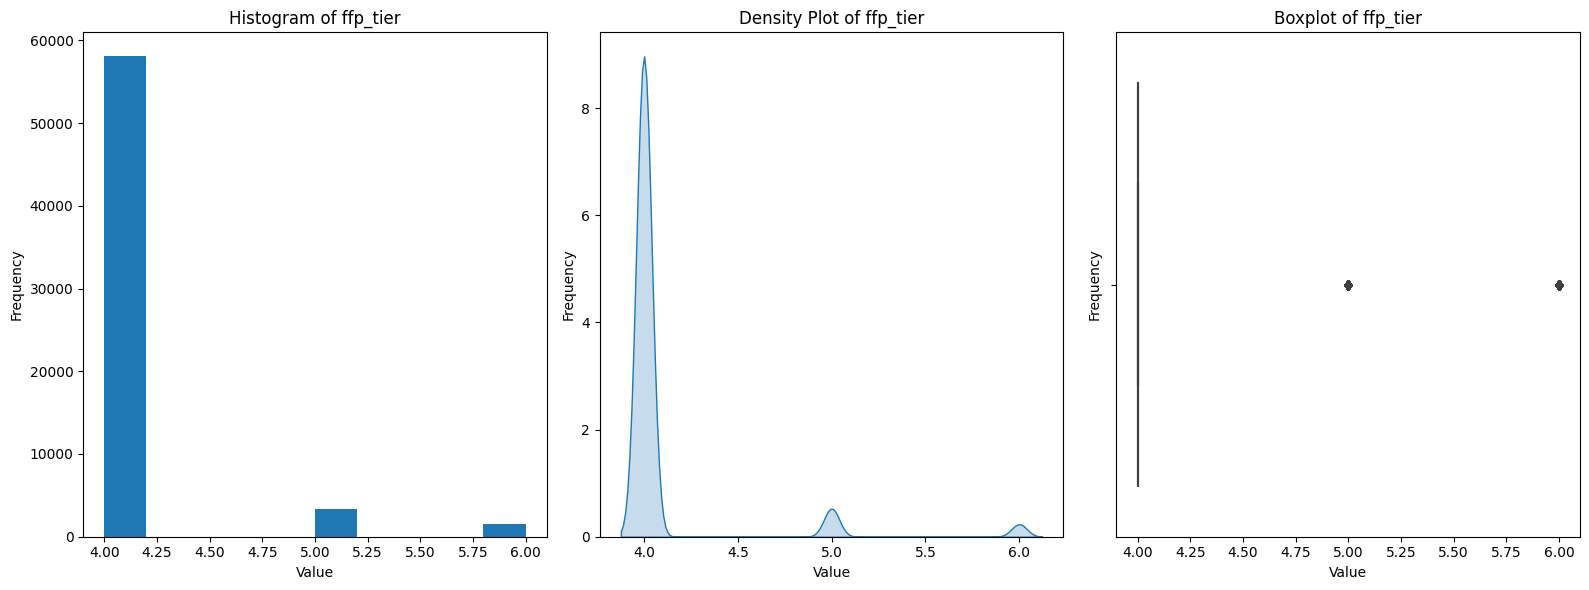

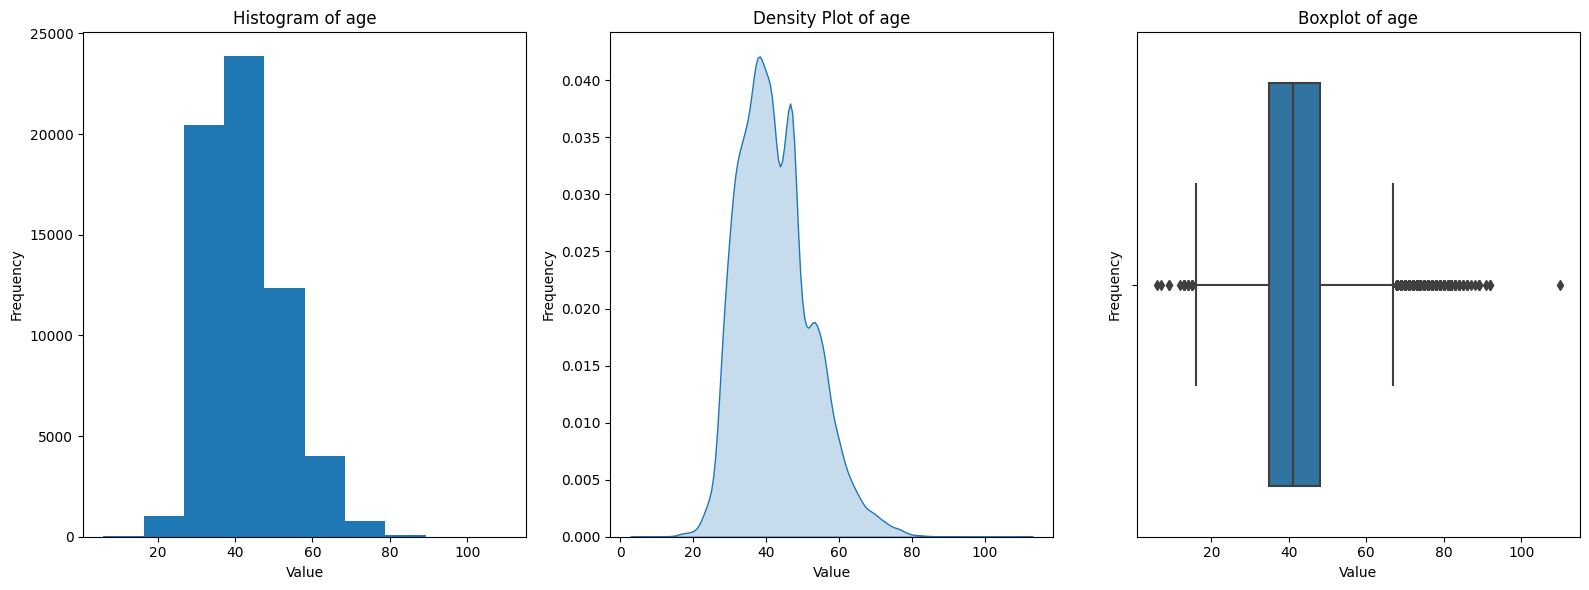

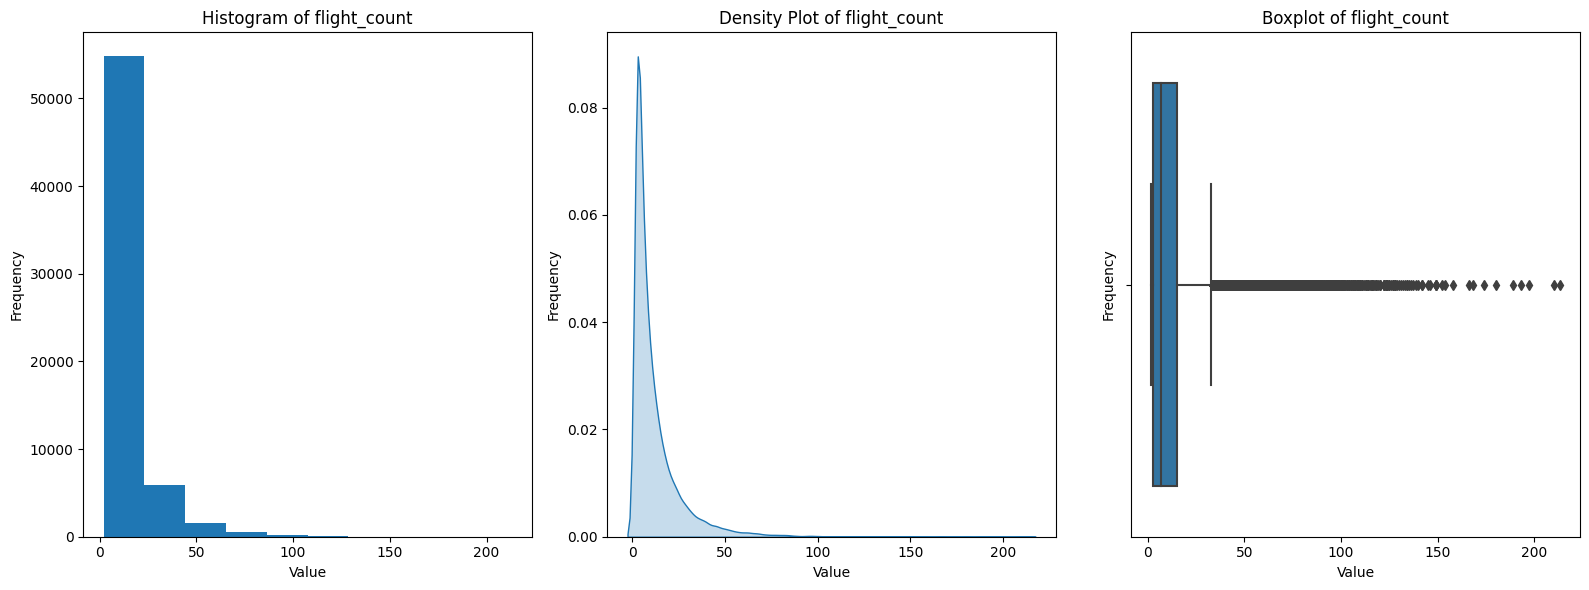

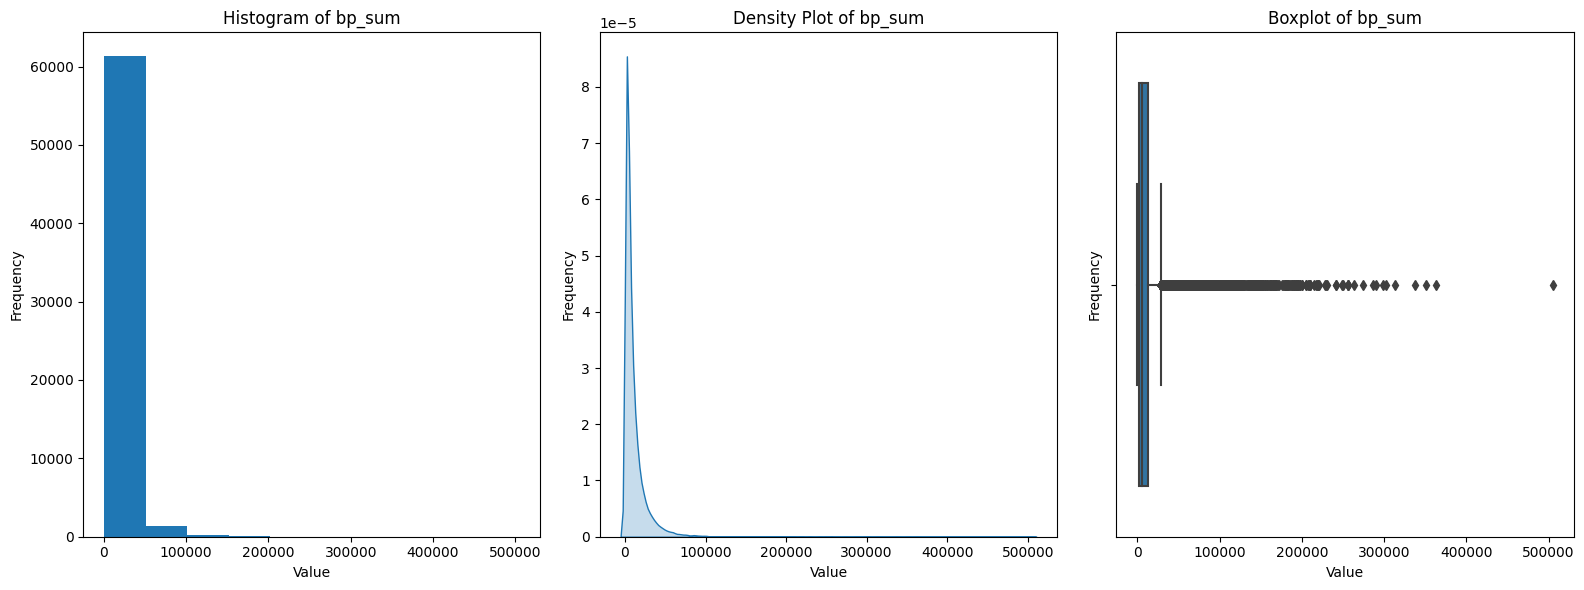

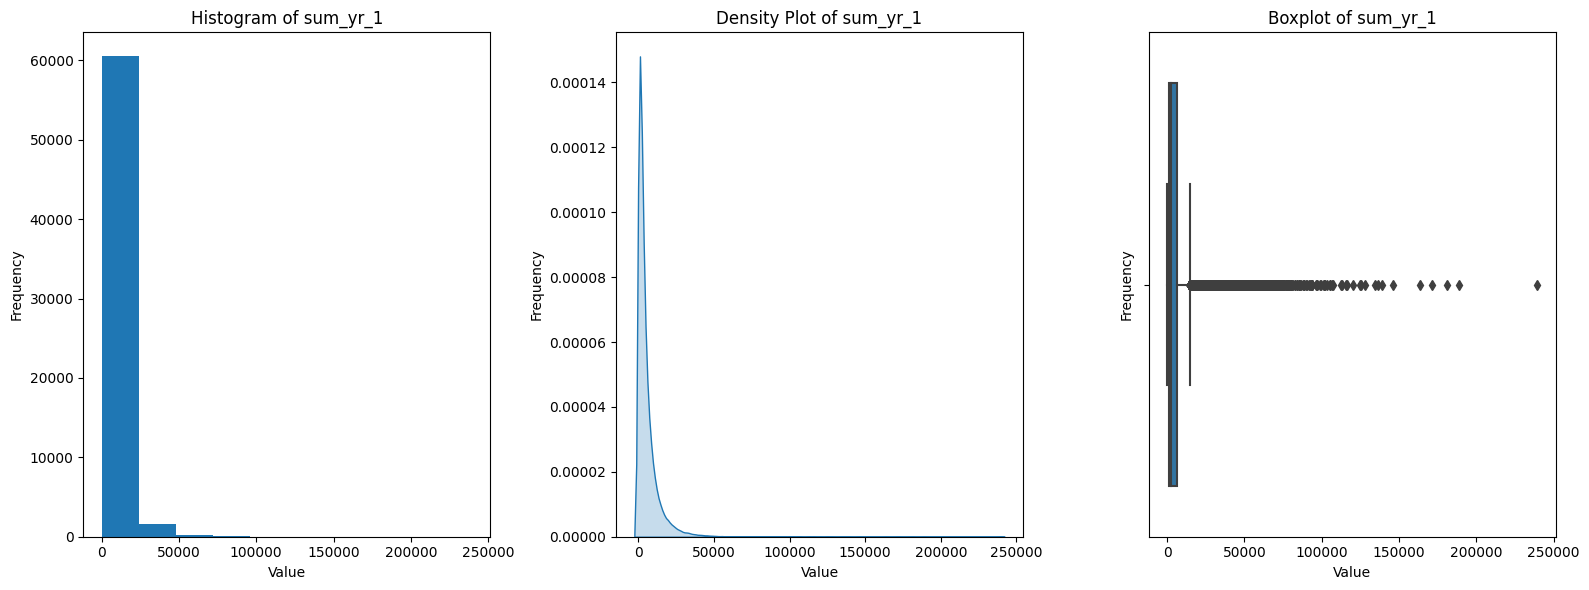

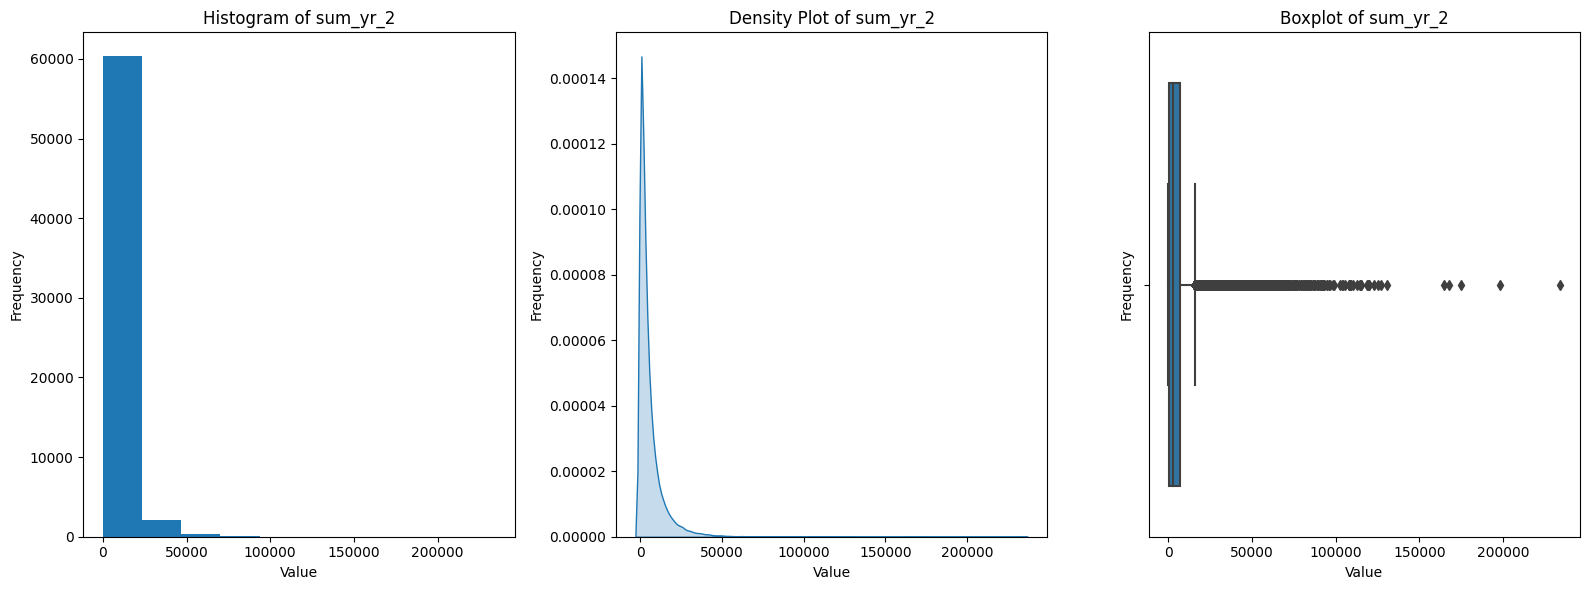

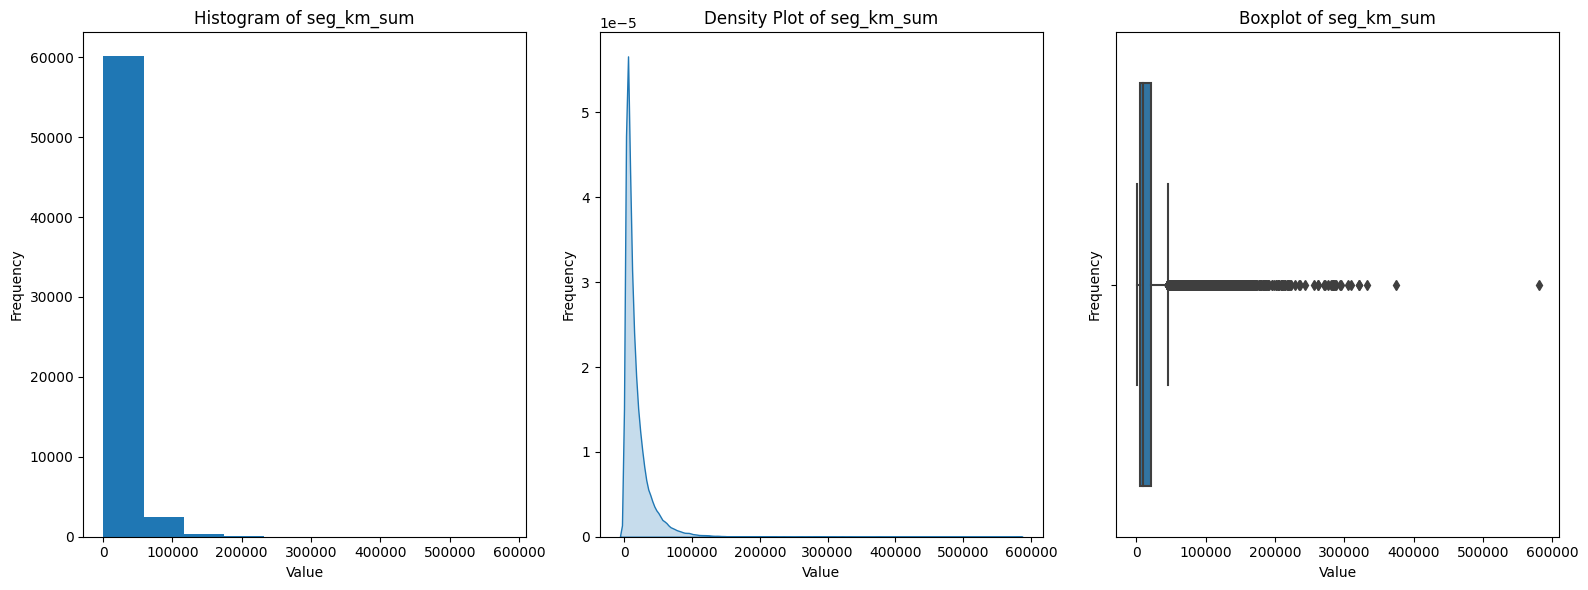

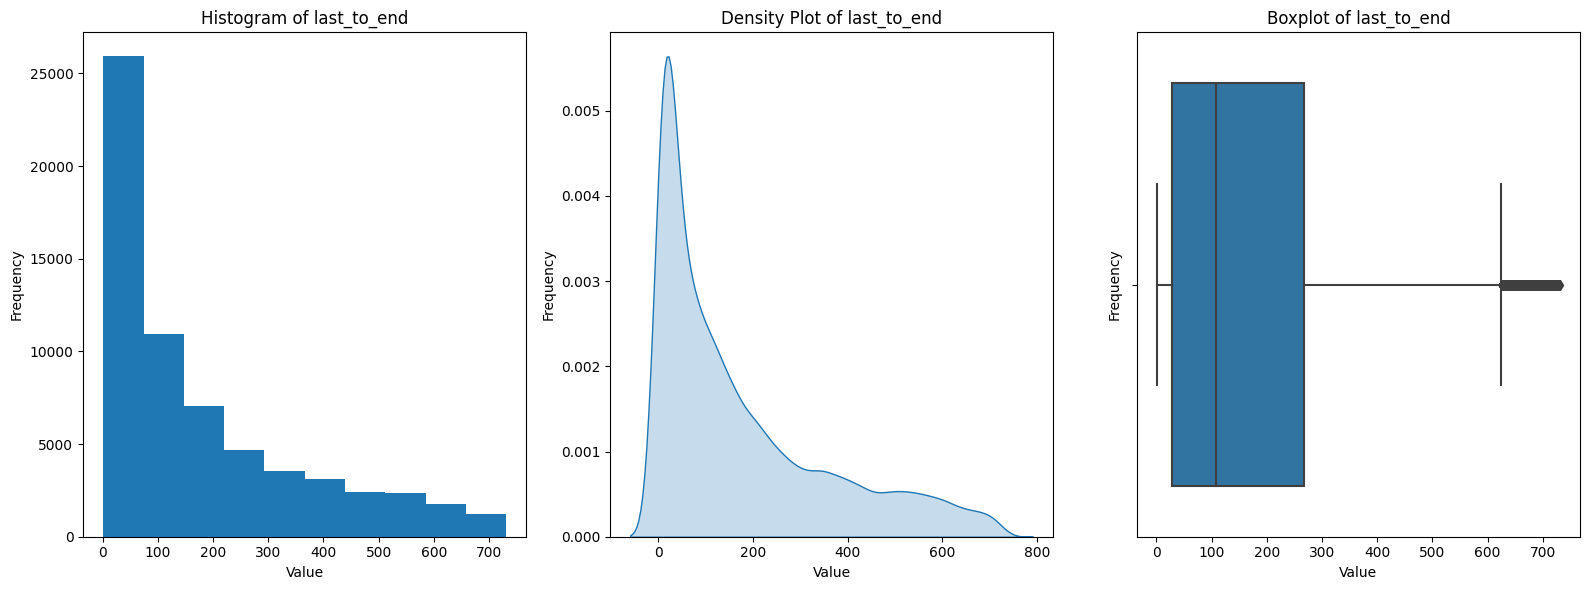

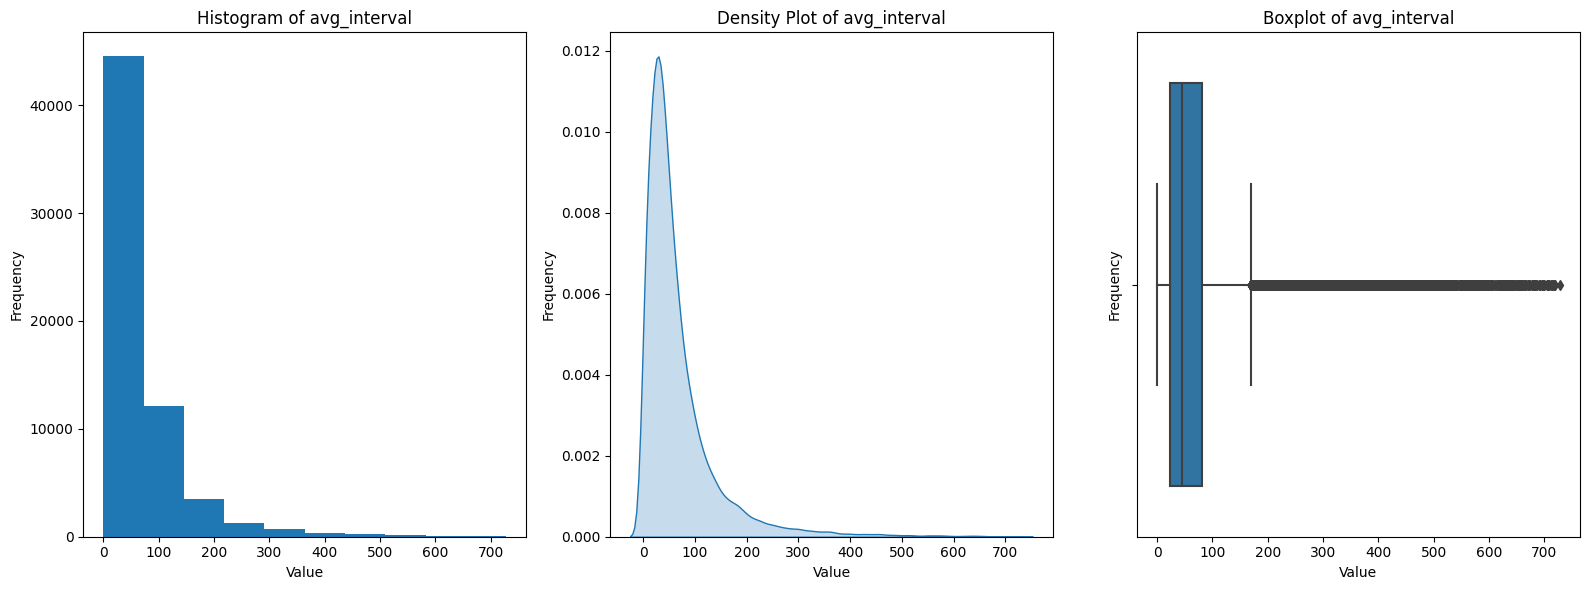

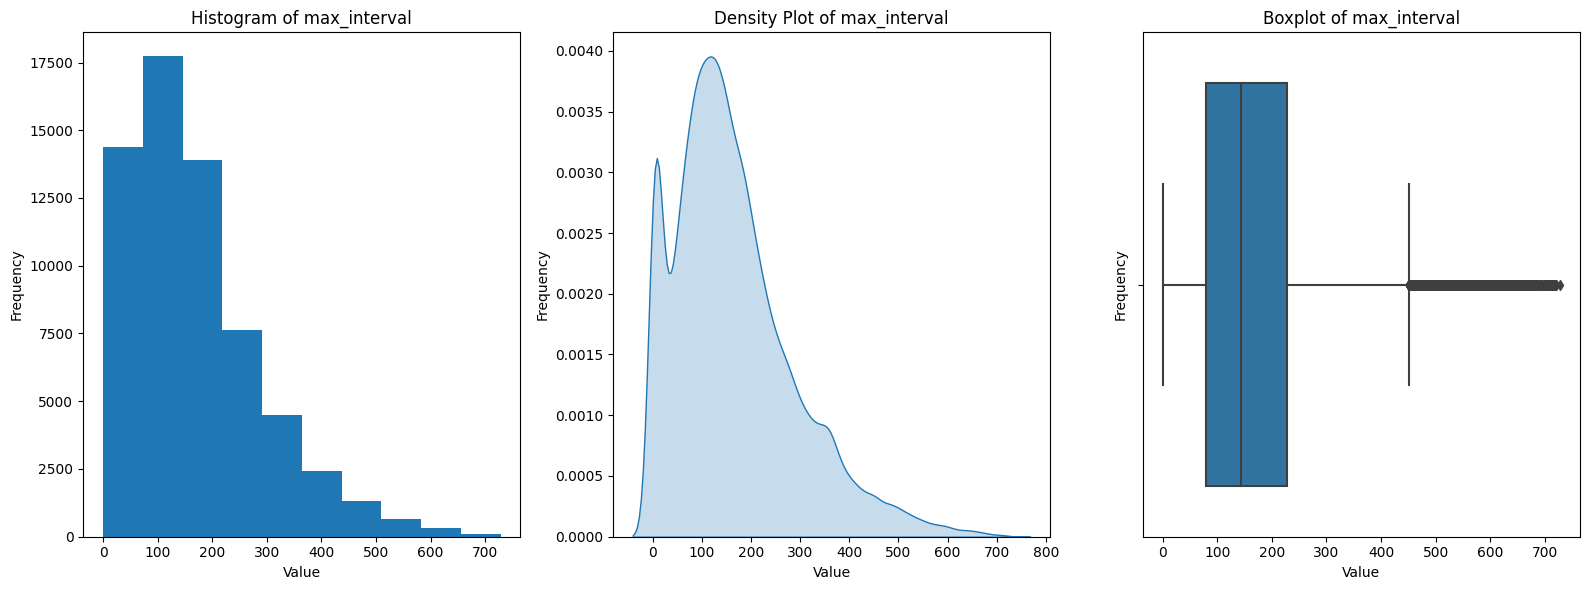

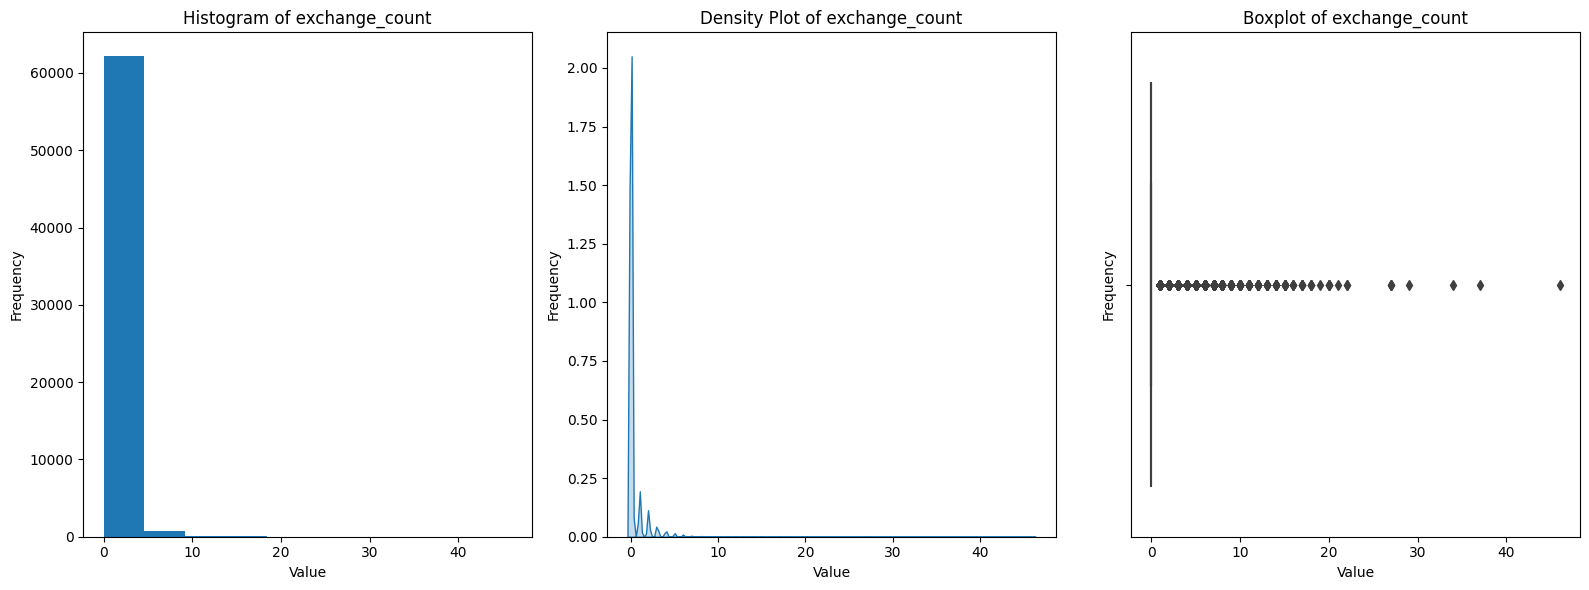

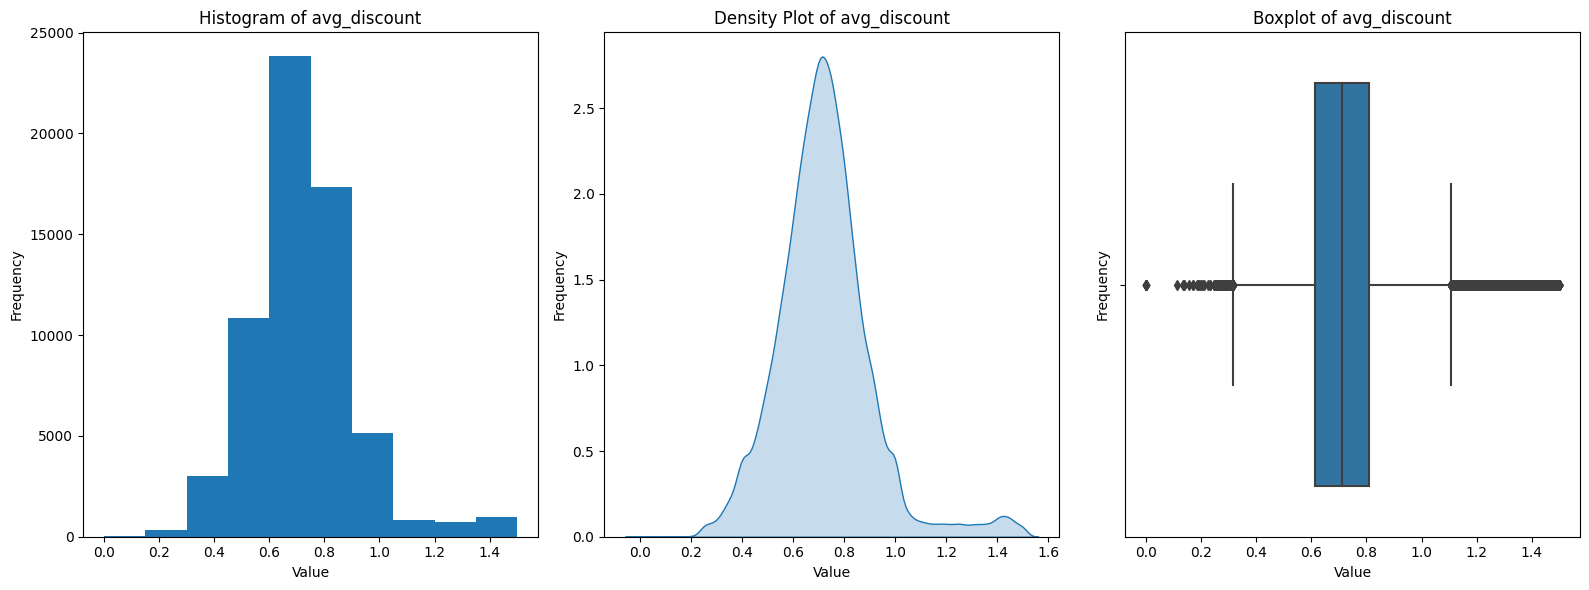

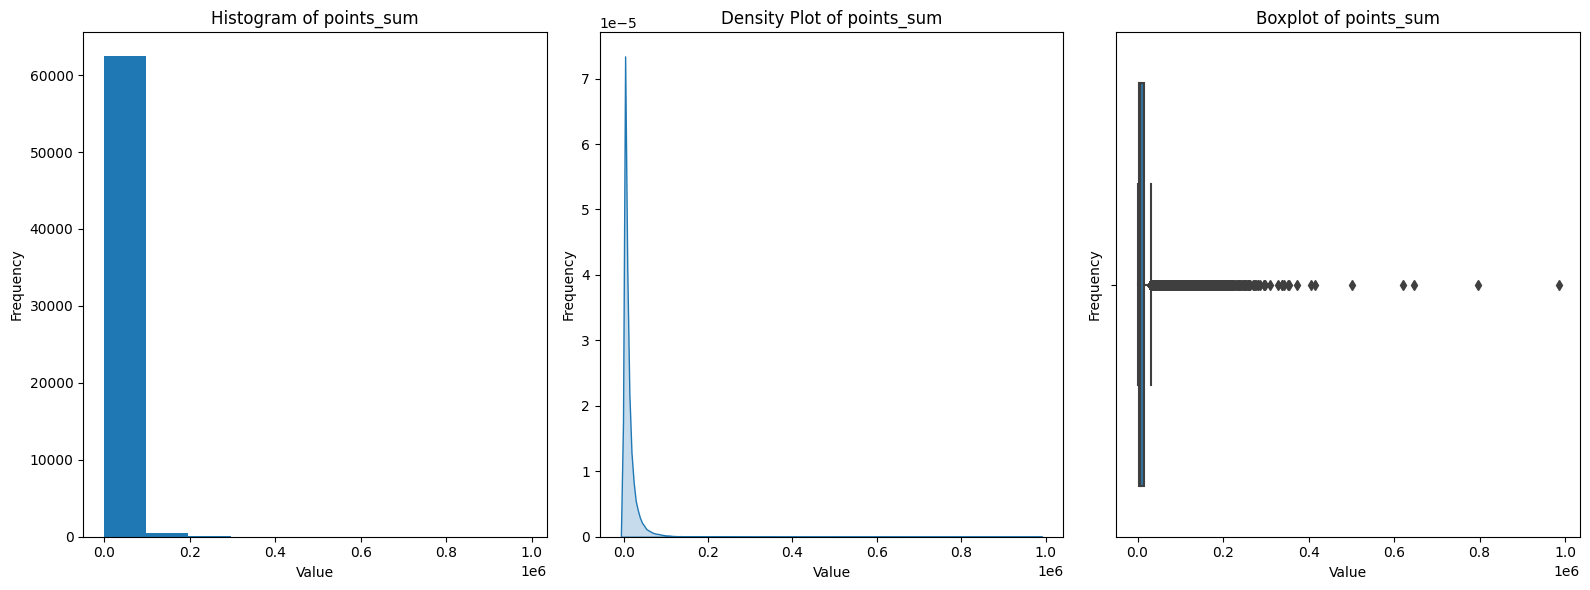

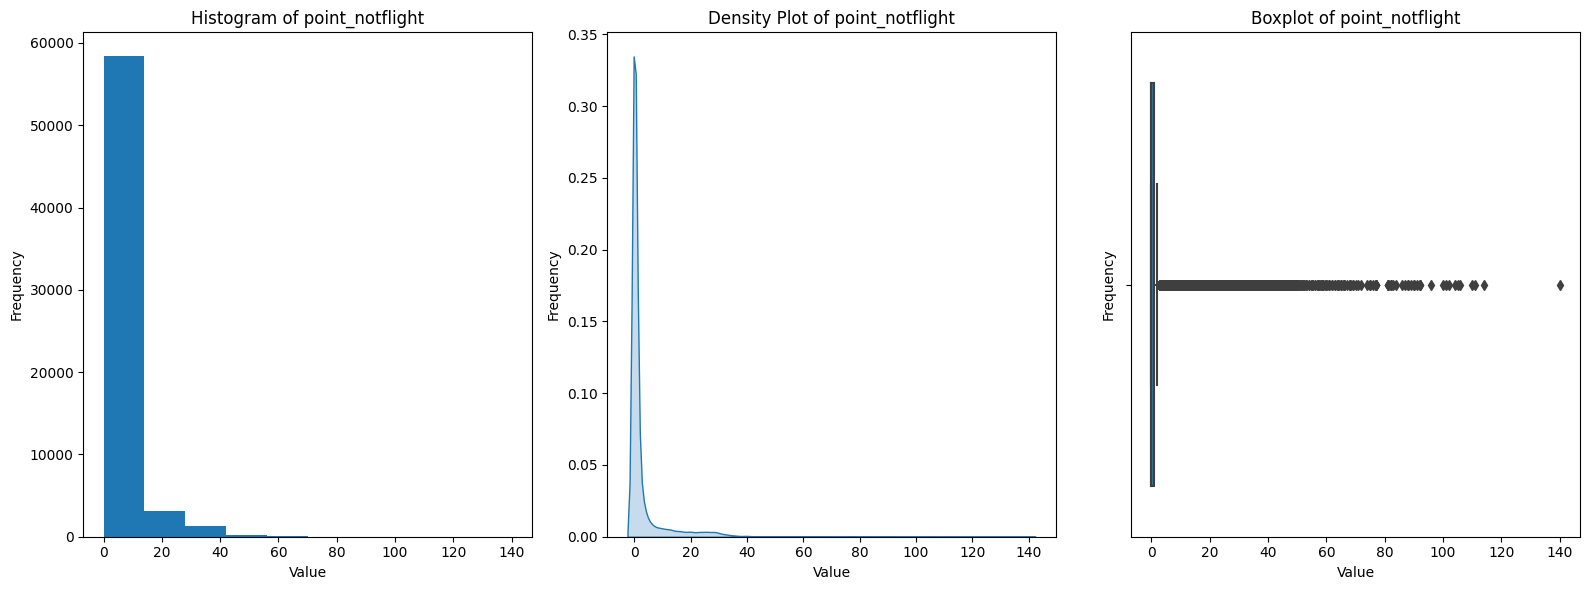

In [20]:
num = df[numericals]

# create figure with 3 subplots
for col in num:
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    
    # Histogram
    ax[0].hist(num[col], bins=10)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram of {}'.format(col))
    
    # Density Plot
    sns.kdeplot(num[col], ax=ax[1], fill=True)
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Frequency')
    ax[1].set_title('Density Plot of {}'.format(col))
    
    # Boxplot
    sns.boxplot(x=num[col], ax=ax[2])
    ax[2].set_xlabel('Value')
    ax[2].set_ylabel('Frequency')
    ax[2].set_title('Boxplot of {}'.format(col))
    
    # Show Plots
    plt.tight_layout()
    plt.show

In [21]:
## ONLY UNCOMMENT ON THE FINAL VERSION OR WHEN NECESSARY, CELL TAKES A LONG TIME TO RUN

# sns.pairplot(df)
# plt.show()

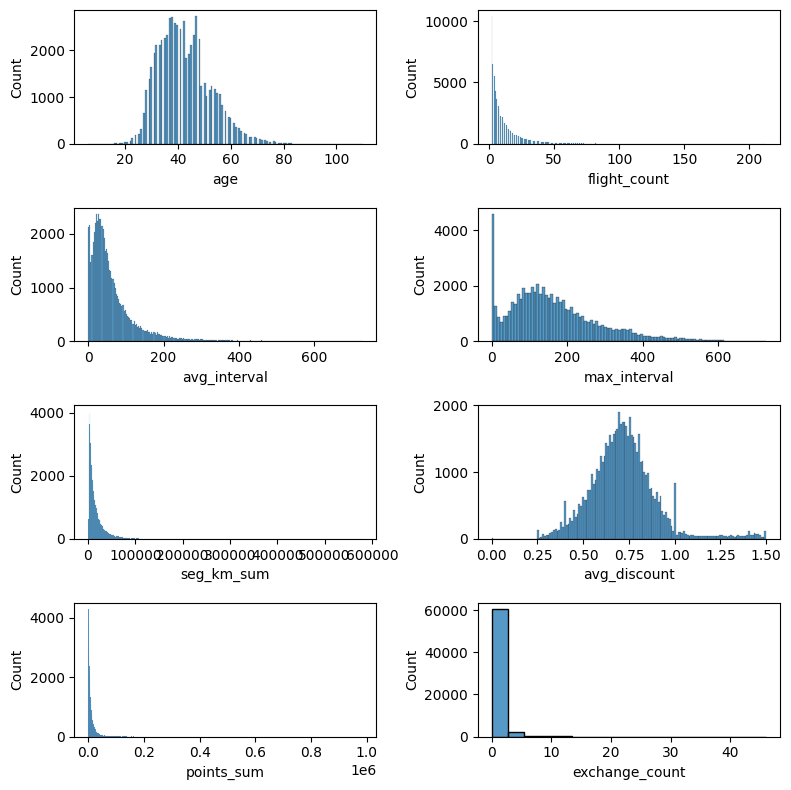

In [22]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(8,8))
sns.histplot(data=df, x='age', ax=axs[0][0])
sns.histplot(data=df, x='flight_count', ax=axs[0][1])
sns.histplot(data=df, x='avg_interval', ax=axs[1][0])
sns.histplot(data=df, x='max_interval', ax=axs[1][1])
sns.histplot(data=df, x='seg_km_sum', ax=axs[2][0])
sns.histplot(data=df, x='avg_discount', ax=axs[2][1])
sns.histplot(data=df, x='points_sum', ax=axs[3][0])
sns.histplot(data=df, x='exchange_count', ax=axs[3][1])

fig.tight_layout()
plt.show()

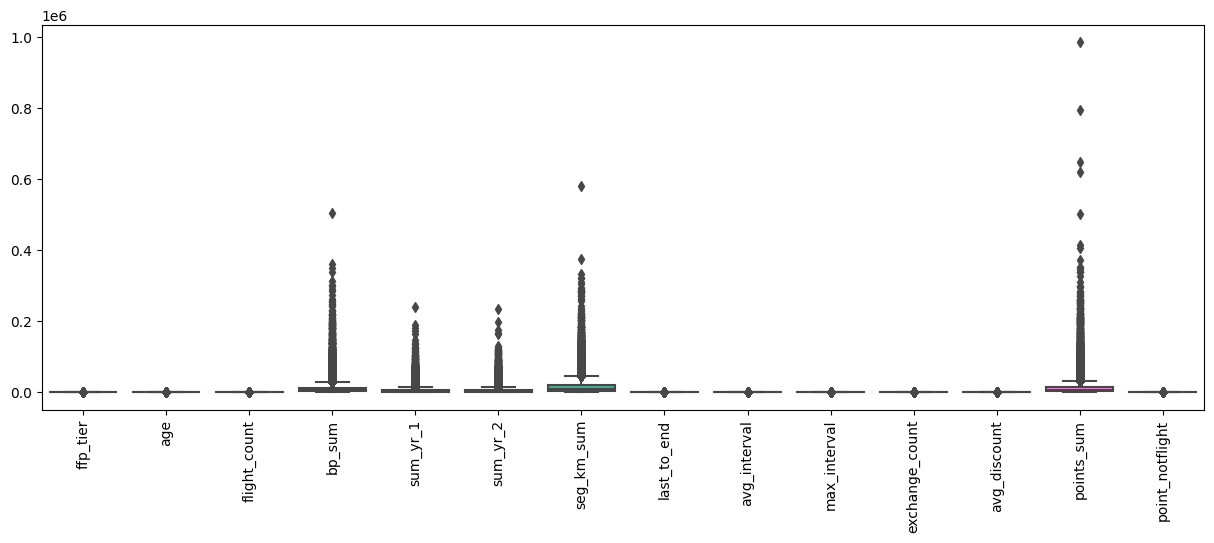

In [23]:
# Check for outliers using box plots
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

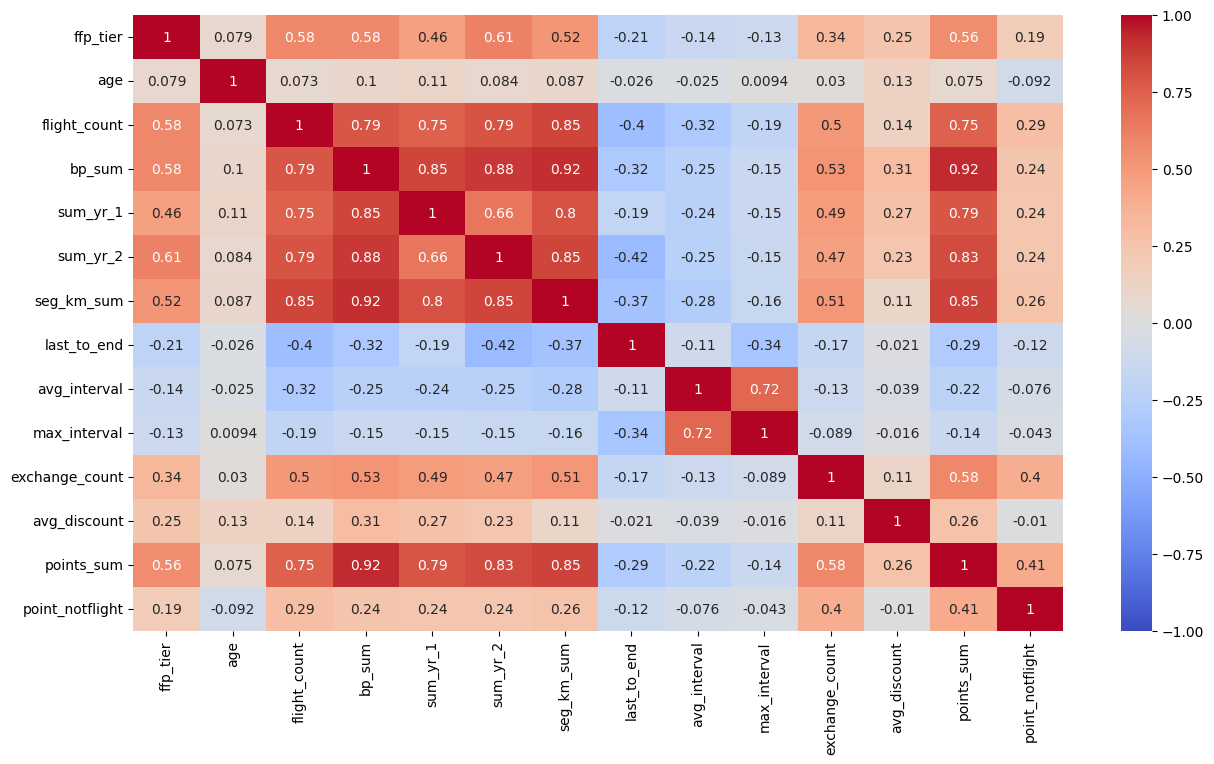

In [24]:
# Check the correlation between variables using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [25]:
# convert the dates to year and month
df['ffp_date_year'] = df['ffp_date'].dt.year
df['first_flight_date_year'] = df['first_flight_date'].dt.year
df['last_flight_date_year'] = df['last_flight_date'].dt.year

# print the dataframe
df.head()

,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,...,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,ffp_date_year,first_flight_date_year,last_flight_date_year
0,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,...,1,3.483254,18,34,0.961639,619760,50,2006,2008,2014
1,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,140,...,7,5.194245,17,29,1.252314,415768,33,2007,2007,2014
2,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,...,11,5.298507,18,20,1.254676,406361,26,2007,2007,2014
3,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,...,97,27.863636,73,11,1.090870,372204,12,2008,2008,2013
4,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,...,5,4.788079,47,27,0.970658,338813,39,2009,2009,2014


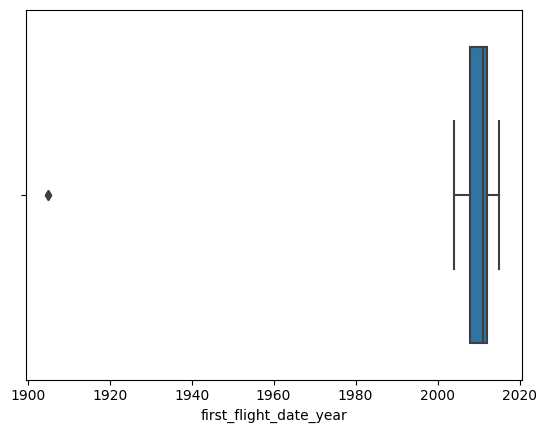

In [26]:
# check distribution of first flight date year
sns.boxplot(x=df["first_flight_date_year"])
plt.show()

In [27]:
# check strange values on first flight date year
df[df["first_flight_date_year"] < 2000]

,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,...,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,ffp_date_year,first_flight_date_year,last_flight_date_year
4455,2011-02-27,1905-12-31,Male,4,dalian,liaoning,CN,35.0,2014-03-31,40,...,18,18.051282,92,1,0.688062,33588,27,2011,1905,2014
30099,2004-11-10,1905-12-31,Female,4,guangzhoushi,guangdongsheng,CN,37.0,2014-03-31,8,...,134,75.000000,178,1,0.775909,26192,38,2004,1905,2013


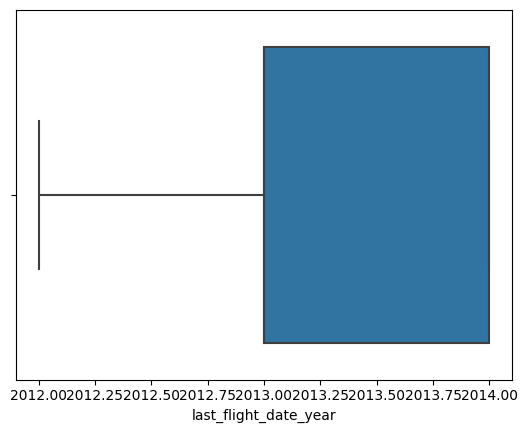

In [28]:
# check distribution of last flight date year
sns.boxplot(x=df["last_flight_date_year"])
plt.show()

Terdapat dua baris dimana tahun penerbangan pertamanya 1905, dimana nilai tersebut bukan nilai yang dianggap masuk akal. Kemungkinan yang terjadi adalah data tidak ada sehingga diisi dengan nilai yang sangat rendah. Jika fitur ini digunakan untuk clustering, maka kedua baris ini harus diubah tahun terbang pertamanya, atau dihapus karena dianggap outlier.

Pada tahun penerbangan terakhir, tidak terdapat data outlier sehingga data aman untuk langsung digunakan tanpa penghapusan outier.


In [29]:
# memeriksa outlier dari tiap kolom numerik menggunakan z-score test
from scipy import stats

numericals = ['ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 'points_sum',
              'point_notflight', 'ffp_date_year', 'first_flight_date_year', 'last_flight_date_year']

zscore = pd.DataFrame()
outlier = pd.DataFrame()
filtered_zscore = np.array([True] * len(df))

for col in numericals:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    outlier[col] = df[col][zscore>3]
    filtered_zscore = (zscore < 3) & filtered_zscore 

outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 62255
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ffp_tier                1513 non-null   int64  
 1   age                     0 non-null      float64
 2   flight_count            555 non-null    float64
 3   bp_sum                  551 non-null    float64
 4   sum_yr_1                0 non-null      float64
 5   sum_yr_2                0 non-null      float64
 6   seg_km_sum              476 non-null    float64
 7   last_to_end             0 non-null      float64
 8   avg_interval            8 non-null      float64
 9   max_interval            8 non-null      float64
 10  exchange_count          336 non-null    float64
 11  avg_discount            314 non-null    float64
 12  points_sum              541 non-null    float64
 13  point_notflight         164 non-null    float64
 14  ffp_date_year           0 non-null     

In [30]:
#drop outlier
print(f'jumlah baris data SEBELUM filter outlier: {len(df)}')

# get index of outliers
outlier_id = outlier.index
df_outlier_removed = df.drop(outlier_id)

print(f'jumlah baris data SETELAH filter outlier: {len(df_outlier_removed)}')

jumlah baris data SEBELUM filter outlier: 62987
jumlah baris data SETELAH filter outlier: 61474


# Feature Engineering
Petunjuk:
* Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.

* Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).

## Feature Scaling

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [32]:
# New DataFrame containing relevant column (column not fixed yet)
selected_features = ['avg_discount', 'points_sum', 'seg_km_sum', 'flight_count', 'last_flight_date_year']
clustering_df = df_outlier_removed[selected_features].copy()

In [33]:
# Data statistics before scaled
clustering_df.describe()

,avg_discount,points_sum,seg_km_sum,flight_count,last_flight_date_year
count,61474.000000,61474.000000,61474.000000,61474.000000,61474.000000
mean,0.715697,11167.528272,15965.063230,11.004750,2013.334922
std,0.178900,15704.788286,17906.129596,11.903707,0.674839
min,0.000000,0.000000,368.000000,2.000000,2012.000000
25%,0.609097,2726.000000,4674.000000,3.000000,2013.000000
50%,0.709090,6142.000000,9747.000000,7.000000,2013.000000
75%,0.804898,13593.000000,20382.750000,14.000000,2014.000000
max,1.500000,985572.000000,321529.000000,132.000000,2014.000000


In [34]:
# Add Imputer to handle missing values
imputer = SimpleImputer(strategy='median')
clustering_df[['points_sum', 'seg_km_sum']] = imputer.fit_transform(clustering_df[['points_sum', 'seg_km_sum']])

In [35]:
# Scale using StandardScaler
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df)

In [36]:
# Convert scaled data to DataFrame
clustering_df_scaled = pd.DataFrame(clustering_df_scaled, columns=selected_features)

In [37]:
# Show scaled data statistics
clustering_df_scaled.describe()

,avg_discount,points_sum,seg_km_sum,flight_count,last_flight_date_year
count,6.147400e+04,6.147400e+04,6.147400e+04,6.147400e+04,6.147400e+04
mean,4.512410e-16,6.657654e-17,5.917915e-17,7.397393e-17,-8.394562e-14
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-4.000579e+00,-7.110964e-01,-8.710531e-01,-7.564722e-01,-1.978150e+00
25%,-5.958669e-01,-5.375174e-01,-6.305749e-01,-6.724640e-01,-4.963032e-01
50%,-3.693001e-02,-3.200023e-01,-3.472617e-01,-3.364315e-01,-4.963032e-01
75%,4.986153e-01,1.544428e-01,2.467157e-01,2.516253e-01,9.855435e-01
max,4.384071e+00,6.204556e+01,1.706491e+01,1.016458e+01,9.855435e-01


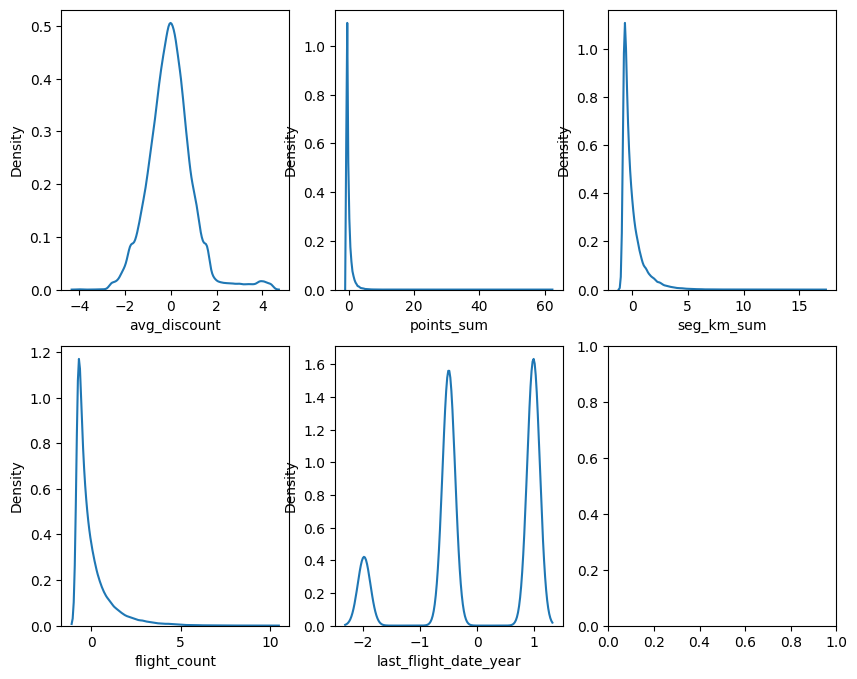

In [38]:
# Create a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# Create a histogram plot of each column in a separate subplot
sns.kdeplot(data=clustering_df_scaled, x="avg_discount", ax=axs[0, 0])
sns.kdeplot(data=clustering_df_scaled, x="points_sum", ax=axs[0, 1])
sns.kdeplot(data=clustering_df_scaled, x="seg_km_sum", ax=axs[0, 2])
sns.kdeplot(data=clustering_df_scaled, x="flight_count", ax=axs[1, 0])
sns.kdeplot(data=clustering_df_scaled, x="last_flight_date_year", ax=axs[1, 1])

plt.show()

## Feature Transformation

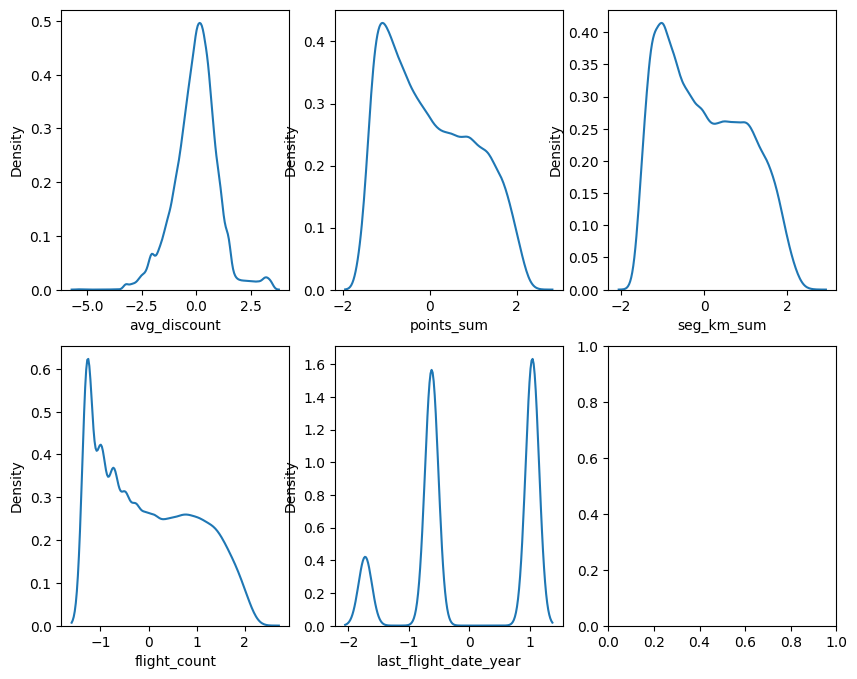

In [39]:
from sklearn.preprocessing import PowerTransformer

# Perform power transformation on skewed data
pt = PowerTransformer(method='yeo-johnson')
clustering_df_transformed = pt.fit_transform(clustering_df_scaled)

# Convert transformed data back to DataFrame
clustering_df_transformed = pd.DataFrame(clustering_df_transformed, columns=clustering_df_scaled.columns)


# Create a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# Create a histogram plot of each column in a separate subplot
sns.kdeplot(data=clustering_df_transformed, x="avg_discount", ax=axs[0, 0])
sns.kdeplot(data=clustering_df_transformed, x="points_sum", ax=axs[0, 1])
sns.kdeplot(data=clustering_df_transformed, x="seg_km_sum", ax=axs[0, 2])
sns.kdeplot(data=clustering_df_transformed, x="flight_count", ax=axs[1, 0])
sns.kdeplot(data=clustering_df_transformed, x="last_flight_date_year", ax=axs[1, 1])

plt.show()

In [40]:
clustering_df_transformed.describe()

,avg_discount,points_sum,seg_km_sum,flight_count,last_flight_date_year
count,6.147400e+04,6.147400e+04,61474.000000,6.147400e+04,6.147400e+04
mean,2.958957e-17,5.917915e-17,0.000000,-5.917915e-17,-5.917915e-17
std,1.000008e+00,1.000008e+00,1.000008,1.000008e+00,1.000008e+00
min,-5.385258e+00,-1.624153e+00,-1.722523,-1.270493e+00,-1.720253e+00
25%,-5.630041e-01,-8.782100e-01,-0.885350,-9.889856e-01,-6.225895e-01
50%,5.535569e-02,-1.432963e-01,-0.119453,-7.200432e-02,-6.225895e-01
75%,5.757783e-01,8.224299e-01,0.828952,8.432798e-01,1.040080e+00
max,3.466596e+00,2.494882e+00,2.592650,2.384888e+00,1.040080e+00


# Clustering
Petunjuk:
* Temukan jumlah cluster yang optimal dengan menggunakan elbow method

* Lakukan clustering menggunakan K-means

* Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA
apabila diperlukan

## Elbow Method

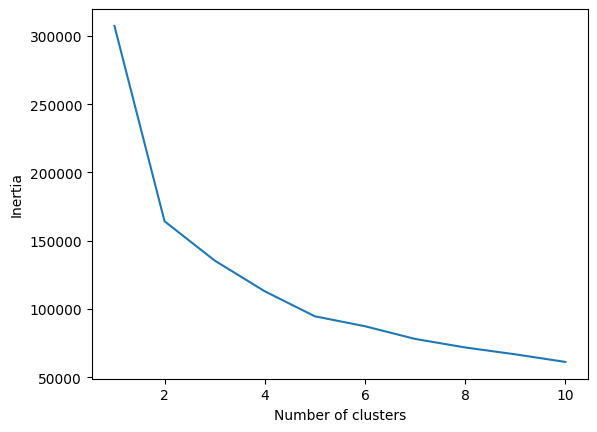

In [41]:
from sklearn.cluster import KMeans

# create an empty list to store the inertia values
inertia = []

# create a range of k values to test
k_range = range(1, 11)

# fit KMeans for each k value and append the inertia to the list
for k in k_range:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(clustering_df_transformed)
    inertia.append(model.inertia_)

# plot the inertia values against k values
plt.plot(k_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## K-Means Clustering

In [42]:
# instantiate the KMeans model with the selected number of clusters
model = KMeans(n_clusters=6, n_init='auto') #optimal numbers tidak terlihat jelas yang mana

# fit the model to the scaled data
model.fit(clustering_df_transformed)

# create a new column in the dataframe for the cluster labels
clustering_df_transformed['cluster'] = model.labels_

In [43]:
clustering_df_transformed

,avg_discount,points_sum,seg_km_sum,flight_count,last_flight_date_year,cluster
0,1.887937,2.426763,2.553731,1.359164,-0.62259,5
1,0.695280,2.400213,2.592615,2.003676,1.04008,5
2,0.546091,2.375230,2.592650,1.558090,1.04008,5
3,1.611718,2.406278,2.496118,1.318148,1.04008,5
4,0.484725,2.369083,2.554269,1.858802,1.04008,5
...,...,...,...,...,...,...
61469,-5.385258,0.708036,-1.560341,-1.270493,-0.62259,3
61470,-5.385258,2.198097,-0.355345,-0.729031,1.04008,3
61471,-5.385258,-1.624153,-1.267306,-1.270493,1.04008,3
61472,-5.385258,-1.624153,-1.016536,-1.270493,-0.62259,3


## PCA

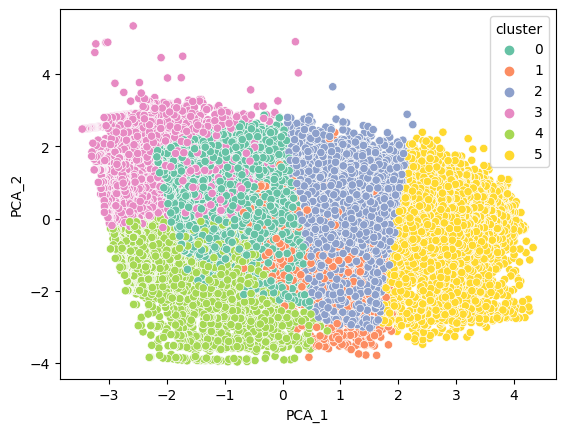

In [44]:
from sklearn.decomposition import PCA

# instantiate PCA model with 2 components
pca = PCA(n_components=2)

# fit and transform the scaled data
pca_transformed = pca.fit_transform(clustering_df_transformed.drop('cluster', axis=1))

# create a new dataframe with the PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_transformed, columns=['PCA_1', 'PCA_2'])
pca_df['cluster'] = clustering_df_transformed['cluster']

# plot the clusters using seaborn
sns.scatterplot(data=pca_df, x='PCA_1', y='PCA_2', hue='cluster', palette='Set2')
plt.show()

# Interpretasi
Petunjuk:
* Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster

* Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing
cluster

* Berdasarkan cluster tersebut, berikan 1-2 rekomendasi

Berdasarkan analisis kepada customer airline data, maka pelanggan dapat dibagi menjadi 4 kelas yaitu

* Kelas 0: Pelanggan di kelas 0 merupakan pelanggan yang memiliki average monetary value yang tinggi, serta frequensi yang tinggi dalam terbang menggunakan pesawat. pelanggan di kelas ini merupakan pelanggan yang paling aktif

* Kelas 1: Pelanggan di kelas 1 merupakan pelanggan yang memiliki average monetary value yang tinggi, namun frequensi penerbangan dan recency yang lebih rendah dibanding kelas 0. pelanggan di kelas ini merupakan pelanggan yang mungkin pernah membeli tiket dalam kuantitas banyak di masa lalu namun sudah tidak sering saat ini

* Kelas 2: Pelanggan di kelas 2 merupakan pelanggan yang memiliki average monetary value yang rendah dibanding kelas 0 dan 1, namun memiliki frequensi penerbangan dan recency yang lebih tinggi. Mereka adalah pelanggan loyal dan masih aktif namun pembelian per transaksi nya dalam jumlah yang kecil.

* Kelas 3: Pelanggan di kelas 3 merupakan pelanggan yang memiliki average monetary value yang paling rendah dan juga frequensi penerbangan yang rendah. Mereka merupakan pelanggan yang jarang melakukan transaksi atau sudah berhenti melakukan transaksi

## Rekomendasi

Beberapa rekomendasi bisnis yang dapat dilakukan untuk berbagai kelas pelanggan

* Kelas 0: Pihak airline harus maintain loyalty pelanggan dengan memberikan additional rewards atau perks serta dapat memberikan akses ke fitur eksklusif yang hanya dapat diakses oleh pelanggan dalam kelas ini.

* Kelas 1: Pihak airline dapat fokus untuk melakukan pemasaran atau meningkatkan kualitas layanan dan memberikan pengalaman yang menyenangkan saat terbang agar pelanggan ini dapat lebih sering melakukan transaksi

* Kelas 2: Pihak airline bisa memberikan penawaran yang personalized sehingga meningkatkan kemauan untuk spend lebih banyak dalam transaksi, seperti membuat program referral, dimana mereka dapat mengajak teman atau keluarga untuk menjadi pelanggan baru dan mendapatkan reward khusus sebagai imbalannya.

* Kelas 3: Pihak airline bisa melakukan targeted marketing dan juga melakukan survey atau research agar mengetahui alasan pelanggan tidak melakukan transaksi lagi serta mengambil tindakan untuk memperbaiki faktor yang menjadi penyebab pelanggan berhenti bertransaksi.

In [45]:
df2 = df.merge(clustering_df_transformed['cluster'],left_index=True, right_index=True)
df2

,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,...,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,ffp_date_year,first_flight_date_year,last_flight_date_year,cluster
0,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,...,3.483254,18,34,0.961639,619760,50,2006,2008,2014,5
1,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,140,...,5.194245,17,29,1.252314,415768,33,2007,2007,2014,5
2,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,...,5.298507,18,20,1.254676,406361,26,2007,2007,2014,5
3,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,...,27.863636,73,11,1.090870,372204,12,2008,2008,2013,5
4,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,...,4.788079,47,27,0.970658,338813,39,2009,2009,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,2010-09-24,2010-09-24,Male,4,ichikawa,chiba,JP,41.0,2014-03-31,2,...,106.000000,106,0,0.850000,700,0,2010,2010,2013,3
61470,2006-04-30,2007-12-02,Male,4,wulumuqishi,xinjiang,CN,49.0,2014-03-31,2,...,40.000000,40,0,0.850000,700,0,2006,2007,2012,3
61471,2012-12-17,2012-12-17,Female,4,dalian,liaoning,CN,30.0,2014-03-31,2,...,158.000000,158,0,0.850000,700,0,2012,2012,2013,3
61472,2011-05-24,2011-05-24,Male,4,shenzhen,guangdong,CN,32.0,2014-03-31,2,...,36.000000,36,0,0.675491,500,0,2011,2011,2014,3


In [46]:
df2[df2['cluster'] == 0].describe()

,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,ffp_date_year,first_flight_date_year,last_flight_date_year,cluster
count,7715.000000,7669.000000,7715.000000,7715.000000,7611.000000,7692.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.0
mean,4.018535,41.862042,4.861050,3491.703305,2000.732361,1794.350104,6442.338950,232.770447,88.108260,184.264290,0.057032,0.701378,4202.259754,1.810888,2009.946598,2010.495010,2013.138043,0.0
std,0.176515,10.101429,2.772299,1777.558667,1843.006913,1732.702314,3119.193392,192.878806,85.643271,141.205012,0.330952,0.180645,3809.323995,5.706219,2.269844,2.219033,0.670693,0.0
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,1134.000000,1.000000,0.000000,0.000000,0.000000,0.136017,0.000000,0.000000,2004.000000,2004.000000,2012.000000,0.0
25%,4.000000,34.000000,3.000000,2093.000000,566.000000,0.000000,4049.500000,70.000000,33.732143,71.000000,0.000000,0.580821,2281.000000,0.000000,2008.000000,2009.000000,2013.000000,0.0
50%,4.000000,40.000000,4.000000,3309.000000,1728.000000,1467.000000,5980.000000,180.000000,69.000000,165.000000,0.000000,0.696702,3581.000000,0.000000,2011.000000,2011.000000,2013.000000,0.0
75%,4.000000,48.000000,6.000000,4689.000000,3030.000000,2857.750000,8364.000000,369.000000,113.500000,269.000000,0.000000,0.804046,5108.000000,0.000000,2012.000000,2012.000000,2014.000000,0.0
max,6.000000,85.000000,36.000000,14165.000000,36602.000000,13400.000000,50758.000000,730.000000,718.000000,718.000000,6.000000,1.500000,94535.000000,57.000000,2013.000000,2014.000000,2014.000000,0.0


In [47]:
df2[df2['cluster'] == 1].describe()

,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,ffp_date_year,first_flight_date_year,last_flight_date_year,cluster
count,10761.000000,10708.000000,10761.000000,10761.000000,10753.000000,10760.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.0
mean,4.059195,42.846937,12.703373,10759.915250,5396.654980,5612.766729,17986.272651,121.898615,52.499736,181.559428,0.274696,0.736233,12154.898337,2.479974,2009.597528,2010.022396,2013.516495,1.0
std,0.282266,9.574150,7.736730,6074.841625,4374.743066,4606.665390,9193.007153,136.645506,35.300975,99.010693,0.827277,0.161865,10857.530703,6.814646,2.322388,2.254397,0.579331,0.0
min,4.000000,13.000000,2.000000,0.000000,0.000000,0.000000,1845.000000,1.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,2004.000000,2004.000000,2012.000000,1.0
25%,4.000000,36.000000,8.000000,6811.000000,2370.000000,2490.750000,11710.000000,23.000000,31.285714,113.000000,0.000000,0.636939,7128.000000,0.000000,2008.000000,2008.000000,2013.000000,1.0
50%,4.000000,42.000000,11.000000,9264.000000,4685.000000,4822.500000,15739.000000,74.000000,44.800000,164.000000,0.000000,0.718690,9883.000000,0.000000,2010.000000,2011.000000,2014.000000,1.0
75%,4.000000,48.000000,16.000000,13065.000000,7407.000000,7639.500000,22050.000000,166.000000,64.500000,232.000000,0.000000,0.803423,14393.000000,1.000000,2012.000000,2012.000000,2014.000000,1.0
max,6.000000,110.000000,85.000000,80349.000000,51014.000000,47632.000000,107038.000000,730.000000,656.000000,681.000000,15.000000,1.500000,647113.000000,111.000000,2013.000000,2015.000000,2014.000000,1.0


In [48]:
df2[df2['cluster'] == 2].describe()

,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,ffp_date_year,first_flight_date_year,last_flight_date_year,cluster
count,9754.000000,9694.000000,9754.000000,9754.000000,9751.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.0
mean,4.051466,43.026821,12.572073,10466.926697,5267.486822,5426.053414,17506.425877,121.714374,50.969392,178.543777,0.239286,0.740728,11660.404449,2.501845,2009.564999,2009.966270,2013.513430,2.0
std,0.266785,9.752276,6.343057,4100.152528,3717.837857,3817.376879,6555.077018,134.769496,35.936532,95.805903,0.718114,0.162772,6203.150738,6.916268,2.319221,2.254901,0.576794,0.0
min,4.000000,16.000000,2.000000,730.000000,0.000000,0.000000,1926.000000,1.000000,0.000000,0.000000,0.000000,0.339656,730.000000,0.000000,2004.000000,2004.000000,2012.000000,2.0
25%,4.000000,36.000000,8.000000,7518.000000,2574.000000,2665.750000,12771.250000,24.000000,31.733333,114.000000,0.000000,0.640527,7875.250000,0.000000,2008.000000,2008.000000,2013.000000,2.0
50%,4.000000,42.000000,12.000000,9913.500000,4848.000000,5001.000000,16653.500000,75.000000,43.833333,161.000000,0.000000,0.722673,10548.000000,0.000000,2010.000000,2011.000000,2014.000000,2.0
75%,4.000000,48.000000,16.000000,12816.000000,7418.000000,7560.750000,21286.500000,166.000000,60.702381,224.000000,0.000000,0.805802,13915.750000,1.000000,2012.000000,2012.000000,2014.000000,2.0
max,6.000000,89.000000,66.000000,83054.000000,37658.000000,35288.000000,85368.000000,721.000000,658.000000,682.000000,16.000000,1.500000,119713.000000,92.000000,2013.000000,2015.000000,2014.000000,2.0


In [49]:
df2[df2['cluster'] == 3].describe()

,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,ffp_date_year,first_flight_date_year,last_flight_date_year,cluster
count,9614.000000,9533.00000,9614.000000,9614.000000,9415.000000,9576.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.0
mean,4.012586,41.35204,3.664968,2411.015394,1444.571566,1262.747076,4658.810693,271.295299,96.547606,165.478157,0.044310,0.677546,3194.981589,1.866445,2010.075307,2010.693572,2013.022675,3.0
std,0.144772,10.04897,2.107480,1514.532370,1469.222492,1417.199719,2615.945140,206.015655,107.232933,152.057063,0.372676,0.184617,10729.937880,6.039835,2.248697,2.189106,0.690174,0.0
min,4.000000,15.00000,2.000000,0.000000,0.000000,0.000000,908.000000,1.000000,0.000000,0.000000,0.000000,0.193546,0.000000,0.000000,2004.000000,2004.000000,2012.000000,3.0
25%,4.000000,34.00000,2.000000,1263.000000,0.000000,0.000000,2695.000000,92.000000,19.500000,30.000000,0.000000,0.548849,1366.500000,0.000000,2008.000000,2009.000000,2013.000000,3.0
50%,4.000000,40.00000,3.000000,2032.000000,1200.000000,937.500000,4046.500000,224.000000,68.000000,135.000000,0.000000,0.672730,2279.000000,0.000000,2011.000000,2011.000000,2013.000000,3.0
75%,4.000000,47.00000,5.000000,3270.750000,2170.000000,1962.000000,5999.000000,432.000000,129.333333,256.000000,0.000000,0.800000,3747.000000,0.000000,2012.000000,2012.000000,2013.000000,3.0
max,6.000000,84.00000,28.000000,10331.000000,36602.000000,19520.000000,20659.000000,731.000000,720.000000,720.000000,22.000000,1.500000,985572.000000,92.000000,2013.000000,2014.000000,2014.000000,3.0


In [50]:
df2[df2['cluster'] == 4].describe()

,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,ffp_date_year,first_flight_date_year,last_flight_date_year,cluster
count,12892.000000,12783.000000,12892.000000,12892.000000,12721.000000,12847.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.0
mean,4.016289,41.544630,4.513729,3154.424372,1785.560019,1659.954231,5852.122944,241.723162,91.389227,178.636674,0.060580,0.696598,3927.941359,1.856190,2009.950977,2010.521176,2013.111697,4.0
std,0.161104,9.948083,2.759580,1875.779880,1751.881154,1692.126241,3170.544289,196.179424,93.761252,144.920094,0.444036,0.179759,6197.985534,5.842192,2.263960,2.407182,0.676360,0.0
min,4.000000,7.000000,2.000000,0.000000,0.000000,0.000000,990.000000,1.000000,0.000000,0.000000,0.000000,0.209795,0.000000,0.000000,2004.000000,1905.000000,2012.000000,4.0
25%,4.000000,34.000000,2.000000,1759.000000,330.000000,0.000000,3532.000000,75.000000,30.000000,59.000000,0.000000,0.575000,1908.000000,0.000000,2008.000000,2009.000000,2013.000000,4.0
50%,4.000000,40.000000,4.000000,2779.500000,1449.000000,1322.000000,5202.500000,192.000000,67.500000,155.000000,0.000000,0.689124,3072.000000,0.000000,2011.000000,2011.000000,2013.000000,4.0
75%,4.000000,47.000000,6.000000,4130.000000,2650.000000,2565.000000,7514.000000,379.000000,120.000000,268.000000,0.000000,0.804589,4671.000000,0.000000,2012.000000,2012.000000,2014.000000,4.0
max,6.000000,92.000000,42.000000,20370.000000,34759.000000,17860.000000,31872.000000,729.000000,728.000000,728.000000,27.000000,1.500000,502044.000000,66.000000,2013.000000,2014.000000,2014.000000,4.0
